# 1.Load 
## 1.1 Load libraries

In [5]:
!pip install rdkit
!pip install gensim
!pip install mol2vec

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip


In [46]:
'''import os
from gensim.models import Word2Vec
from mol2vec.features import mol2alt_sentence'''

'import os\nfrom gensim.models import Word2Vec\nfrom mol2vec.features import mol2alt_sentence'

## 1.2 Load data
The dataset is cleaned and filtered the the family of interest.

In [7]:
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

from src.scripts.load_and_save import load_data
from src.utils.exploration_and_clean import explore_column, quick_check_column, clean_metrics

'''from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
'''

'from plotly.subplots import make_subplots\nimport plotly.graph_objects as go\nimport plotly.express as px\n'

In [8]:
df = load_data()
df.head()

/mloscratch/homes/mdupont/other/ada/ada-2024-project-laambada/src/scripts/load_and_save.py:16: DtypeWarning: Columns (10,11,15,17,20,21,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(zip_file_path, compression='zip')


,BindingDB Reactant_set_id,Ligand SMILES,Ligand InChI,Ligand InChI Key,BindingDB MonomerID,BindingDB Ligand Name,Target Name,Target Source Organism According to Curator or DataSource,Ki (nM),IC50 (nM),...,Ligand MW,logP,Charge,Aliphatic OH,Aromatic NH,Ester,Ether,Amide,Ketone,Benzene Ring
0,2880,Cn1ncc2c(cccc12)-c1cccn2nc(Nc3ccc4CCN(CCc4c3)C...,"InChI=1S/C29H31N7O2/c1-29(2,3)38-28(37)35-15-1...",MAZKPYXDQCNDAZ-UHFFFAOYSA-N,2013,"US8501936, 298::US8501936, 300",Tyrosine-protein kinase JAK2,Homo sapiens,NaN,16.54,...,509.614,5.3623,0,0,0,0,1,1,0,2
1,2953,Cn1ncc2c(cccc12)-c1cccn2nc(Nc3ccc4CCN(CCc4c3)C...,"InChI=1S/C29H31N7O2/c1-29(2,3)38-28(37)35-15-1...",MAZKPYXDQCNDAZ-UHFFFAOYSA-N,2013,"US8501936, 298::US8501936, 300",Tyrosine-protein kinase JAK3,Homo sapiens,NaN,226.9,...,509.614,5.3623,0,0,0,0,1,1,0,2
2,3039,Cn1ncc2c(cccc12)-c1cccn2nc(Nc3ccc4CCN(CCc4c3)C...,"InChI=1S/C29H31N7O2/c1-29(2,3)38-28(37)35-15-1...",MAZKPYXDQCNDAZ-UHFFFAOYSA-N,2013,"US8501936, 298::US8501936, 300",Tyrosine-protein kinase JAK2,Homo sapiens,NaN,16.51,...,509.614,5.3623,0,0,0,0,1,1,0,2
3,3041,CS(=O)(=O)c1ccc(cc1)C(=C)n1nc(NC(=O)Nc2ccc(cc2...,InChI=1S/C24H27N7O3S/c1-4-22-27-23(29-31(22)17...,IMNDRGLFDWUUKR-UHFFFAOYSA-N,2061,"US8501936, 90",Tyrosine-protein kinase JAK2,Homo sapiens,NaN,9999,...,493.593,2.8972,0,0,0,0,0,2,0,2
4,3072,CS(=O)(=O)c1ccc(cc1)C(=C)n1nc(NC(=O)Nc2ccc(cc2...,InChI=1S/C24H27N7O3S/c1-4-22-27-23(29-31(22)17...,IMNDRGLFDWUUKR-UHFFFAOYSA-N,2061,"US8501936, 90",Tyrosine-protein kinase JAK3,Homo sapiens,NaN,9999,...,493.593,2.8972,0,0,0,0,0,2,0,2


In [9]:
df = load_data()
df.head()

/mloscratch/homes/mdupont/other/ada/ada-2024-project-laambada/src/scripts/load_and_save.py:16: DtypeWarning: Columns (10,11,15,17,20,21,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(zip_file_path, compression='zip')


,BindingDB Reactant_set_id,Ligand SMILES,Ligand InChI,Ligand InChI Key,BindingDB MonomerID,BindingDB Ligand Name,Target Name,Target Source Organism According to Curator or DataSource,Ki (nM),IC50 (nM),...,Ligand MW,logP,Charge,Aliphatic OH,Aromatic NH,Ester,Ether,Amide,Ketone,Benzene Ring
0,2880,Cn1ncc2c(cccc12)-c1cccn2nc(Nc3ccc4CCN(CCc4c3)C...,"InChI=1S/C29H31N7O2/c1-29(2,3)38-28(37)35-15-1...",MAZKPYXDQCNDAZ-UHFFFAOYSA-N,2013,"US8501936, 298::US8501936, 300",Tyrosine-protein kinase JAK2,Homo sapiens,NaN,16.54,...,509.614,5.3623,0,0,0,0,1,1,0,2
1,2953,Cn1ncc2c(cccc12)-c1cccn2nc(Nc3ccc4CCN(CCc4c3)C...,"InChI=1S/C29H31N7O2/c1-29(2,3)38-28(37)35-15-1...",MAZKPYXDQCNDAZ-UHFFFAOYSA-N,2013,"US8501936, 298::US8501936, 300",Tyrosine-protein kinase JAK3,Homo sapiens,NaN,226.9,...,509.614,5.3623,0,0,0,0,1,1,0,2
2,3039,Cn1ncc2c(cccc12)-c1cccn2nc(Nc3ccc4CCN(CCc4c3)C...,"InChI=1S/C29H31N7O2/c1-29(2,3)38-28(37)35-15-1...",MAZKPYXDQCNDAZ-UHFFFAOYSA-N,2013,"US8501936, 298::US8501936, 300",Tyrosine-protein kinase JAK2,Homo sapiens,NaN,16.51,...,509.614,5.3623,0,0,0,0,1,1,0,2
3,3041,CS(=O)(=O)c1ccc(cc1)C(=C)n1nc(NC(=O)Nc2ccc(cc2...,InChI=1S/C24H27N7O3S/c1-4-22-27-23(29-31(22)17...,IMNDRGLFDWUUKR-UHFFFAOYSA-N,2061,"US8501936, 90",Tyrosine-protein kinase JAK2,Homo sapiens,NaN,9999,...,493.593,2.8972,0,0,0,0,0,2,0,2
4,3072,CS(=O)(=O)c1ccc(cc1)C(=C)n1nc(NC(=O)Nc2ccc(cc2...,InChI=1S/C24H27N7O3S/c1-4-22-27-23(29-31(22)17...,IMNDRGLFDWUUKR-UHFFFAOYSA-N,2061,"US8501936, 90",Tyrosine-protein kinase JAK3,Homo sapiens,NaN,9999,...,493.593,2.8972,0,0,0,0,0,2,0,2


# Multivariate

In [10]:
properties = ['Ligand MW', 'logP']	
metrics = ['pKi', 'pIC50']

n_properties = len(properties)
n_metrics = len(metrics)

In [11]:
from src.utils.exploration_and_clean import clean_metrics

try:
    df['IC50 (nM)'] = clean_metrics(df['IC50 (nM)'])
except:
    pass

df['pIC50'] = np.where(
    df['IC50 (nM)'] > 0,  # Only apply log10 to positive values
    -np.log10(df['IC50 (nM)'] * 1e-9),  # Transform to molar and take -log10
    np.nan  # Assign NaN for zero or negative values
)
df['pKi'] = np.where(
    df['Ki (nM)'] > 0,  # Only apply log10 to positive values
    -np.log10(df['Ki (nM)'] * 1e-9),  # Transform to molar and take -log10
    np.nan  # Assign NaN for zero or negative values
)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [12]:
df.head()

,BindingDB Reactant_set_id,Ligand SMILES,Ligand InChI,Ligand InChI Key,BindingDB MonomerID,BindingDB Ligand Name,Target Name,Target Source Organism According to Curator or DataSource,Ki (nM),IC50 (nM),...,Charge,Aliphatic OH,Aromatic NH,Ester,Ether,Amide,Ketone,Benzene Ring,pIC50,pKi
0,2880,Cn1ncc2c(cccc12)-c1cccn2nc(Nc3ccc4CCN(CCc4c3)C...,"InChI=1S/C29H31N7O2/c1-29(2,3)38-28(37)35-15-1...",MAZKPYXDQCNDAZ-UHFFFAOYSA-N,2013,"US8501936, 298::US8501936, 300",Tyrosine-protein kinase JAK2,Homo sapiens,NaN,16.54,...,0,0,0,0,1,1,0,2,7.781464,NaN
1,2953,Cn1ncc2c(cccc12)-c1cccn2nc(Nc3ccc4CCN(CCc4c3)C...,"InChI=1S/C29H31N7O2/c1-29(2,3)38-28(37)35-15-1...",MAZKPYXDQCNDAZ-UHFFFAOYSA-N,2013,"US8501936, 298::US8501936, 300",Tyrosine-protein kinase JAK3,Homo sapiens,NaN,226.90,...,0,0,0,0,1,1,0,2,6.644166,NaN
2,3039,Cn1ncc2c(cccc12)-c1cccn2nc(Nc3ccc4CCN(CCc4c3)C...,"InChI=1S/C29H31N7O2/c1-29(2,3)38-28(37)35-15-1...",MAZKPYXDQCNDAZ-UHFFFAOYSA-N,2013,"US8501936, 298::US8501936, 300",Tyrosine-protein kinase JAK2,Homo sapiens,NaN,16.51,...,0,0,0,0,1,1,0,2,7.782253,NaN
3,3041,CS(=O)(=O)c1ccc(cc1)C(=C)n1nc(NC(=O)Nc2ccc(cc2...,InChI=1S/C24H27N7O3S/c1-4-22-27-23(29-31(22)17...,IMNDRGLFDWUUKR-UHFFFAOYSA-N,2061,"US8501936, 90",Tyrosine-protein kinase JAK2,Homo sapiens,NaN,9999.00,...,0,0,0,0,0,2,0,2,5.000043,NaN
4,3072,CS(=O)(=O)c1ccc(cc1)C(=C)n1nc(NC(=O)Nc2ccc(cc2...,InChI=1S/C24H27N7O3S/c1-4-22-27-23(29-31(22)17...,IMNDRGLFDWUUKR-UHFFFAOYSA-N,2061,"US8501936, 90",Tyrosine-protein kinase JAK3,Homo sapiens,NaN,9999.00,...,0,0,0,0,0,2,0,2,5.000043,NaN


In [13]:
df.columns

Index(['BindingDB Reactant_set_id', 'Ligand SMILES', 'Ligand InChI',
       'Ligand InChI Key', 'BindingDB MonomerID', 'BindingDB Ligand Name',
       'Target Name',
       'Target Source Organism According to Curator or DataSource', 'Ki (nM)',
       'IC50 (nM)', 'Kd (nM)', 'EC50 (nM)', 'kon (M-1-s-1)', 'koff (s-1)',
       'pH', 'Temp (C)', 'Curation/DataSource', 'Article DOI',
       'BindingDB Entry DOI', 'PMID', 'PubChem AID', 'Patent Number',
       'Authors', 'Institution', 'Link to Ligand in BindingDB',
       'Link to Target in BindingDB',
       'Link to Ligand-Target Pair in BindingDB', 'Ligand HET ID in PDB',
       'PDB ID(s) for Ligand-Target Complex', 'PubChem CID', 'PubChem SID',
       'ChEBI ID of Ligand', 'ChEMBL ID of Ligand', 'DrugBank ID of Ligand',
       'IUPHAR_GRAC ID of Ligand', 'KEGG ID of Ligand', 'ZINC ID of Ligand',
       'Number of Protein Chains in Target (>1 implies a multichain complex)',
       'BindingDB Target Chain Sequence', 'PDB ID(s) of Target

In [14]:
# Ligan analysis 
from rdkit import Chem
from rdkit.Chem import Descriptors, Fragments

In [15]:
df = df[:2000]

In [16]:
# To save executions time
execution_times = []

smiles_to_molecules = []
for smiles in df['Ligand SMILES']:
    start_time = time.time()
    molecule = Chem.MolFromSmiles(smiles) 
    smiles_to_molecules.append(molecule)
    end_time = time.time()
    execution_times.append(end_time - start_time)

# statistics for time
mean_time = np.mean(execution_times)
std_time = np.std(execution_times)

print(f"Mean execution time: {mean_time} seconds")
print(f"Standard deviation: {std_time} seconds")
#print(f"Estimation for the full dataset: {round(len(df_bindingDB)*mean_time/60)} minutes")

df['RDKIT Molecules'] = smiles_to_molecules

print(f"Number of molecules not processed by rdkit: {df['RDKIT Molecules'].isna().sum()} out of {len(df)} ligands")
# Delete these rows
df = df.dropna(subset=['RDKIT Molecules'])
print(len(df))

Mean execution time: 0.00021499764919281005 seconds
Standard deviation: 5.064455250672193e-05 seconds
Number of molecules not processed by rdkit: 0 out of 2000 ligands
2000


## 4. Characterization via embeddings

### 1. Characterization of all the ligands of the family

##### a. RDKit Descriptors

In [17]:
# Import required libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#import seaborn as sns
from tqdm import tqdm

In [18]:
def getMolDescriptors(mol, missingVal=None):
    ''' calculate the full list of descriptors for a molecule, expect those starting with fr_
    
        missingVal is used if the descriptor cannot be calculated
    '''
    res = {}
    filtered_desc_list = [(nm, fn) for nm, fn in Descriptors._descList if not nm.startswith('fr_')]
    for nm,fn in filtered_desc_list:
        # some of the descriptor fucntions can throw errors if they fail, catch those here:
        try:
            val = fn(mol)
        except:
            # print the error message:
            import traceback
            traceback.print_exc()
            # and set the descriptor value to whatever missingVal is
            val = missingVal
        res[nm] = val
    return res

In [19]:
# Step 1: Calculate molecular descriptors
def calculate_descriptors(molecule):
    """Calculate key molecular descriptors for a molecule"""
    
    # Calculate all descriptors
    all_descriptors = getMolDescriptors(molecule)
    
    
    return all_descriptors

# Calculate descriptors for all molecules
descriptor_data = []
for mol in tqdm(df['RDKIT Molecules'].dropna()):
    descriptor_data.append(calculate_descriptors(mol))

# Convert to DataFrame
descriptor_df = pd.DataFrame(descriptor_data)



100%|██████████| 2000/2000 [00:25<00:00, 79.11it/s] 


In [20]:

# Step 2: Perform PCA
# Standardize the features
scaler = StandardScaler()
scaled_descriptors = scaler.fit_transform(descriptor_df)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_descriptors)


In [21]:
# Step 3: Perform t-SNE
tsne = TSNE(n_components=2, random_state=42, verbose=True, n_iter=250, n_jobs=12, perplexity =3)
tsne_result = tsne.fit_transform(scaled_descriptors)


[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.001s...
[t-SNE] Computed neighbors for 2000 samples in 0.281s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.800903
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000


In [22]:
from src.utils.retrieve_family import retrieve_family

uniprot_ids = df["UniProt (SwissProt) Entry Name of Target Chain"].unique()
family_dict = await retrieve_family(uniprot_ids)


  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 8/8 [00:00<00:00, 66.07it/s]


PCA explained variance ratio: [0.27404938 0.17928763]


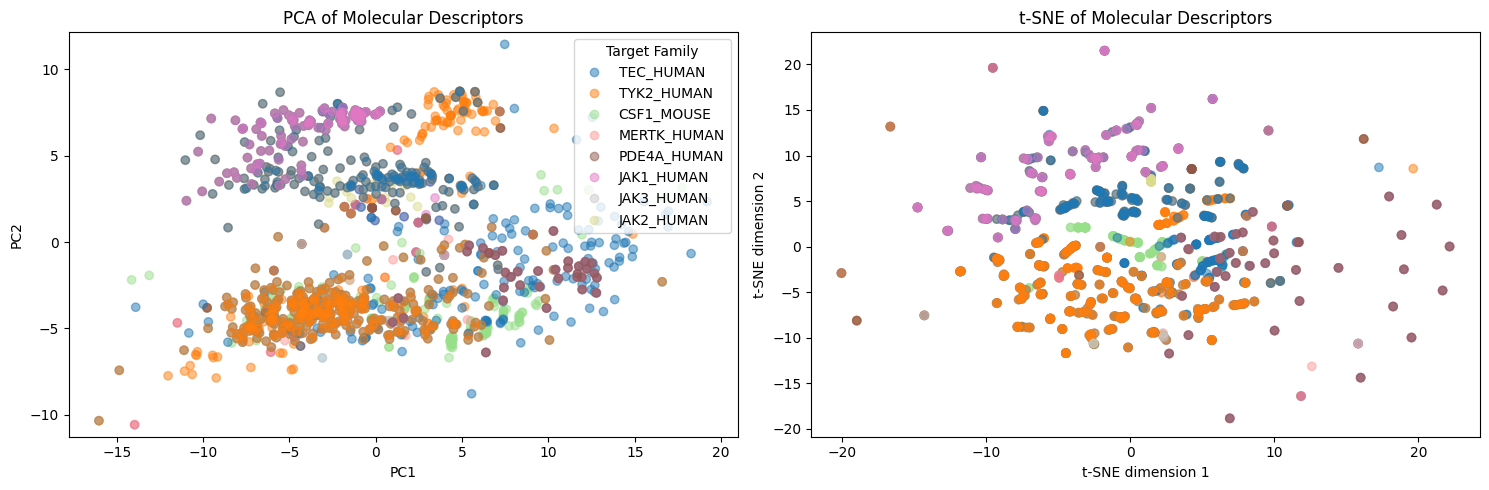

"plt.figure(figsize=(10, 6))\nsns.heatmap(feature_importance, annot=True, cmap='RdBu', center=0)\nplt.title('PCA Feature Importance Heatmap')\nplt.tight_layout()\nplt.show()"

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

print(f'PCA explained variance ratio: {pca.explained_variance_ratio_}')
# Plot PCA results, color by target name
# Assign each target name a colour (integer)
colour_dict = {name: i for i, name in enumerate(df['Target Name'].unique())}
scatter1 = ax1.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5, c=df['Target Name'].map(colour_dict), cmap='tab20')
ax1.set_title('PCA of Molecular Descriptors')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.legend(handles=scatter1.legend_elements()[0], labels=family_dict.keys(), title='Target Family')
ax1.grid()
ax1.axis('equal')

# Plot t-SNE results
scatter2 = ax2.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5, c=df['Target Name'].map(colour_dict), cmap='tab20')
ax2.set_title('t-SNE of Molecular Descriptors')
ax2.set_xlabel('t-SNE dimension 1')
ax2.set_ylabel('t-SNE dimension 2')
ax1.grid()
plt.tight_layout()
plt.show()

# Additional analysis: Feature importance in PCA
feature_importance = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=descriptor_df.columns
)

'''plt.figure(figsize=(10, 6))
sns.heatmap(feature_importance, annot=True, cmap='RdBu', center=0)
plt.title('PCA Feature Importance Heatmap')
plt.tight_layout()
plt.show()'''

##### a.1. Evaluation of the PCA and t-SNE clusters

In [24]:
# Perform K-means clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.stats import mode

In [25]:
pca_data = np.array(list(zip(pca_result[:, 0], pca_result[:, 1])))
tsne_data = np.array(list(zip(tsne_result[:, 0], tsne_result[:, 1])))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


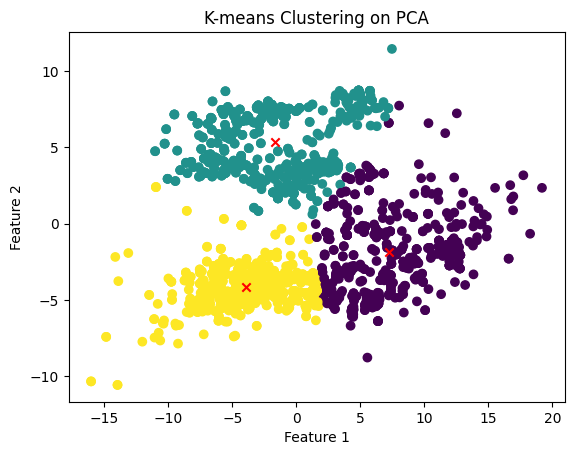

In [26]:
## PCA
pca_kmeans = KMeans(n_clusters=3, random_state=0)#TODO : best number of clusters based on the silhouette
pca_kmeans.fit(pca_data)

# Get the cluster labels
pca_labels = pca_kmeans.labels_
pca_centers = pca_kmeans.cluster_centers_

#Visualize the clustering results
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=pca_labels, cmap='viridis')
plt.scatter(pca_centers[:, 0], pca_centers[:, 1], c='red', marker='x')
plt.title('K-means Clustering on PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


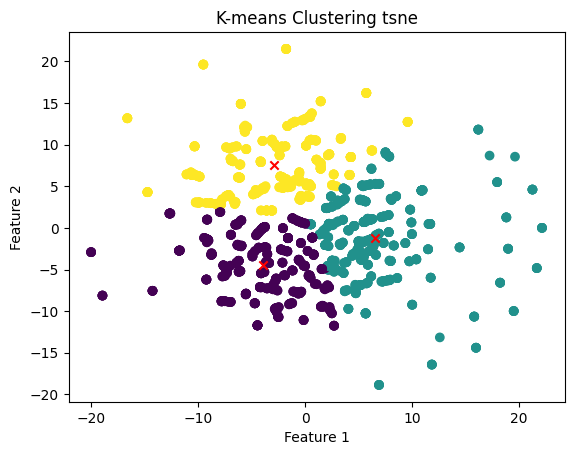

In [27]:
## tsne
tsne_kmeans = KMeans(n_clusters=3, random_state=0)#TODO : best number of clusters based on the silhouette
tsne_kmeans.fit(tsne_data)

# Get the cluster labels
tsne_labels = tsne_kmeans.labels_
tsne_centers = tsne_kmeans.cluster_centers_

#Visualize the clustering results
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=tsne_labels, cmap='viridis')
plt.scatter(tsne_centers[:, 0], tsne_centers[:, 1], c='red', marker='x')
plt.title('K-means Clustering tsne')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [28]:
# silhouette of the found clusters
pca_silhouette_avg = silhouette_score(pca_data, pca_labels)
print(f'Silhouette Score pca: {pca_silhouette_avg}')

tsne_silhouette_avg = silhouette_score(tsne_data, tsne_labels)
print(f'Silhouette Score pca: {tsne_silhouette_avg}')


Silhouette Score pca: 0.49698499598255197
Silhouette Score pca: 0.3537749648094177


In [29]:
# average silhouette score for each cluster PCA
# Compute the silhouette scores for each sample
pca_silhouette_vals = silhouette_samples(pca_data, pca_labels)

# Calculate the average silhouette score for each cluster
pca_cluster_silhouette_avg = {}
for cluster in np.unique(pca_labels):
    pca_cluster_silhouette_avg[cluster] = np.mean(pca_silhouette_vals[pca_labels == cluster])

# Print the average silhouette score for each cluster
print('For PCA')
for cluster, silhouette_avg in pca_cluster_silhouette_avg.items():
    print(f'Cluster {cluster}: Average Silhouette Score = {silhouette_avg}')


For PCA
Cluster 0: Average Silhouette Score = 0.4511368379023438
Cluster 1: Average Silhouette Score = 0.4429566542895881
Cluster 2: Average Silhouette Score = 0.588983511621145


In [30]:
# average silhouette score for each cluster for t-sne
# Compute the silhouette scores for each sample
tsne_silhouette_vals = silhouette_samples(tsne_data, tsne_labels)

# Calculate the average silhouette score for each cluster
tsne_cluster_silhouette_avg = {}
for cluster in np.unique(pca_labels):
    tsne_cluster_silhouette_avg[cluster] = np.mean(tsne_silhouette_vals[pca_labels == cluster])

# Print the average silhouette score for each cluster
print('For t-SNE')
for cluster, silhouette_avg in tsne_cluster_silhouette_avg.items():
    print(f'Cluster {cluster}: Average Silhouette Score = {silhouette_avg}')


For t-SNE
Cluster 0: Average Silhouette Score = 0.3392579257488251
Cluster 1: Average Silhouette Score = 0.33595460653305054
Cluster 2: Average Silhouette Score = 0.3836471140384674


In [31]:
def calculate_purity(cluster_labels, true_labels):
    clusters = np.unique(cluster_labels)
    majority_sum = 0
    for cluster in clusters:
        true_labels_in_cluster = true_labels[cluster_labels == cluster]
        majority_label = np.unique(true_labels_in_cluster, return_counts=True)
        majority_sum += np.sum(true_labels_in_cluster == majority_label)
    purity = majority_sum / len(true_labels)
    return purity

In [32]:
# purity of the clusters based on ground truth labels
true_labels = df['Target Name']

pca_purity = calculate_purity(pca_labels, true_labels)
print(f'Purity PCA: {pca_purity}')

tsne_purity = calculate_purity(tsne_labels, true_labels)
print(f'Purity tsne: {tsne_purity}')

Purity PCA: 0.0
Purity tsne: 0.0


#### b. Mol2vec 

To detect more global and subtile (but less interpretable) differences we use here a pretrained Mol2vec available here : https://github.com/samoturk/mol2vec/tree/master/examples/models 


This model  was trained on 20 million compounds downloaded from ZINC using:
- radius 1
- UNK to replace all identifiers that appear less than 4 times
- skip-gram and window size of 10 
- resulting in 300 dimensional embeddings

Mol2Vec is inspired by Word2vec and it creates embeddings based on the structural and chemical information of the molecules using a substructure approach. 

##### c. Morgan Fingerprints (ECFP) 

Morgan fingerprint captures the local environment around each atom up to a specified radius. 

In [33]:
from rdkit.Chem import AllChem

In [34]:
def get_ecfp_descriptors(mol, radius=2, nBits=1024) : 
    val = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits)
    return val

In [37]:
# Calculer les statistiques
mean_time = np.mean(execution_times)
std_time = np.std(execution_times)

print(len(execution_times))

print(f"Mean execution time: {mean_time} seconds")
print(f"Standard deviation: {std_time} seconds")
print(f"Estimation for the full dataset: {round(len(df)*mean_time/60)} minutes")


2000
Mean execution time: 0.00021499764919281005 seconds
Standard deviation: 5.064455250672193e-05 seconds
Estimation for the full dataset: 0 minutes


In [40]:
# Generate Morgan Fingerprints (ECFP) with radius=2 and 1024 bits (ECFP4)
ecfp_rad2 = [AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024) for mol in df['RDKIT Molecules']]
df['ecfp_rad2'] = ecfp_rad2

execution_times = []
ecfp_embeddings = []
print(f'Start {len(df)} samples')
for mol in tqdm(df['RDKIT Molecules'].dropna()):
    if len(execution_times) % 50 == 0:
        print(f'{len(execution_times)} steps')
    start_time = time.time()
    ecfp_embeddings.append(get_ecfp_descriptors(mol))
    end_time = time.time()
    execution_times.append(end_time - start_time)

# Calculer les statistiques
mean_time = np.mean(execution_times)
std_time = np.std(execution_times)

print(f"Mean execution time: {mean_time} seconds")
print(f"Standard deviation: {std_time} seconds")
#print(f"Estimation for the full dataset: {round(len(df_bindingDB)*mean_time/60)} minutes")

# Padding to ensure same size
#Convert ExplicitBitVect to list
ecfp_descriptors_list = [list(fp) for fp in ecfp_embeddings]

ecfp_descriptors_df = pd.DataFrame(ecfp_descriptors_list)

Start 2000 samples


100%|██████████| 2000/2000 [00:00<00:00, 13517.00it/s]

0 steps
50 steps
100 steps
150 steps
200 steps
250 steps
300 steps
350 steps
400 steps
450 steps
500 steps
550 steps
600 steps
650 steps
700 steps
750 steps
800 steps
850 steps
900 steps
950 steps
1000 steps
1050 steps
1100 steps
1150 steps
1200 steps
1250 steps
1300 steps
1350 steps
1400 steps
1450 steps
1500 steps
1550 steps
1600 steps
1650 steps
1700 steps
1750 steps
1800 steps
1850 steps
1900 steps
1950 steps
Mean execution time: 7.222592830657959e-05 seconds
Standard deviation: 2.2616082285521267e-05 seconds


In [41]:
# Step 2: Perform PCA
# Standardize the features
scaler = StandardScaler()
scaled_descriptors = scaler.fit_transform(ecfp_descriptors_df)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_descriptors)

In [42]:
# Step 3: Perform t-SNE
tsne = TSNE(n_components=2, random_state=42, verbose=True, n_iter=250, n_jobs=12, perplexity =3)
tsne_result = tsne.fit_transform(scaled_descriptors)

[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.010s...
[t-SNE] Computed neighbors for 2000 samples in 0.281s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.761581
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000


PCA explained variance ratio: [0.03933965 0.0243656 ]


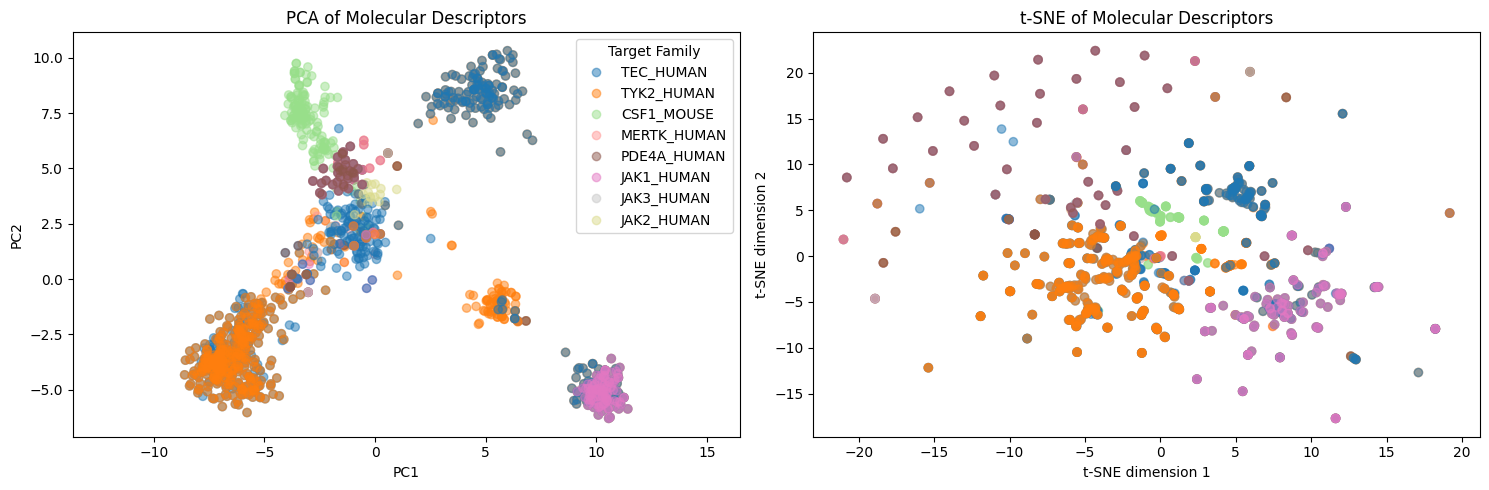

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

print(f'PCA explained variance ratio: {pca.explained_variance_ratio_}')
# Plot PCA results, color by target name
# Assign each target name a colour (integer)
colour_dict = {name: i for i, name in enumerate(df['Target Name'].unique())}
scatter1 = ax1.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5, c=df['Target Name'].map(colour_dict), cmap='tab20')
ax1.set_title('PCA of Molecular Descriptors')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.legend(handles=scatter1.legend_elements()[0], labels=family_dict.keys(), title='Target Family')
ax1.grid()
ax1.axis('equal')

# Plot t-SNE results
scatter2 = ax2.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5, c=df['Target Name'].map(colour_dict), cmap='tab20')
ax2.set_title('t-SNE of Molecular Descriptors')
ax2.set_xlabel('t-SNE dimension 1')
ax2.set_ylabel('t-SNE dimension 2')
ax1.grid()
plt.tight_layout()
plt.show()

# Additional analysis: Feature importance in PCA
feature_importance = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=ecfp_descriptors_df.columns
)


In [ ]:
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

from src.scripts.load_and_save import load_data
from src.utils.exploration_and_clean import explore_column, quick_check_column, clean_metrics

'''from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
'''

'from plotly.subplots import make_subplots\nimport plotly.graph_objects as go\nimport plotly.express as px\n'

In [ ]:
def get_mol2vec_descriptors(mol, model) : 
    """ Get the mol2vec descriptors for a molecule """
    identifier = mol2alt_sentence(mol, 1)
    embeddings = [model.wv[token] for token in identifier if token in model.wv]
    val = np.mean(embeddings, axis=0)
    return val
     

In [ ]:
pretrained_model_path = os.path.join(os.getcwd(), 'model_300dim.pkl') 
model = Word2Vec.load(pretrained_model_path)
print('number of unique identifiers', len(model.wv.key_to_index))

execution_times = []

mol2vec_embeddings = []
for mol in tqdm(df_subset['RDKIT Molecules'].dropna()):
    start_time = time.time()
    mol2vec_embeddings.append(get_mol2vec_descriptors(mol, model))
    end_time = time.time()
    execution_times.append(end_time - start_time)

# Calculer les statistiques
mean_time = np.mean(execution_times)
std_time = np.std(execution_times)

print(f"Mean execution time: {mean_time} seconds")
print(f"Standard deviation: {std_time} seconds")
print(f"Estimation for the full dataset: {round(len(df_bindingDB)*mean_time/60)} minutes")

# Padding to ensure same size
mol2vec_descriptors_df = pd.DataFrame(mol2vec_embeddings)

number of unique identifiers 21003


  0%|          | 0/21 [00:00<?, ?it/s][17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECA

Mean execution time: 0.00421777225676037 seconds
Standard deviation: 0.012885149519600507 seconds
Estimation for the full dataset: 0 minutes


In [ ]:

# Step 2: Perform PCA
# Standardize the features
scaler = StandardScaler()
scaled_descriptors = scaler.fit_transform(mol2vec_descriptors_df)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_descriptors)

In [ ]:
# Step 3: Perform t-SNE
tsne = TSNE(n_components=2, random_state=42, verbose=True, n_iter=250, n_jobs=12, perplexity =3)
tsne_result = tsne.fit_transform(scaled_descriptors)


[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 21 samples in 0.000s...
[t-SNE] Computed neighbors for 21 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 21 / 21
[t-SNE] Mean sigma: 6.786056
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.393387
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000


c:\Users\Laura\anaconda3\envs\ADA\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


PCA explained variance ratio: [0.21102089 0.18200676]


C:\Users\Laura\AppData\Local\Temp\ipykernel_9568\1953359015.py:11: UserWarning: Mismatched number of handles and labels: len(handles) = 1 len(labels) = 7
  ax1.legend(handles=scatter1.legend_elements()[0], labels=family_dict.keys(), title='Target Family')


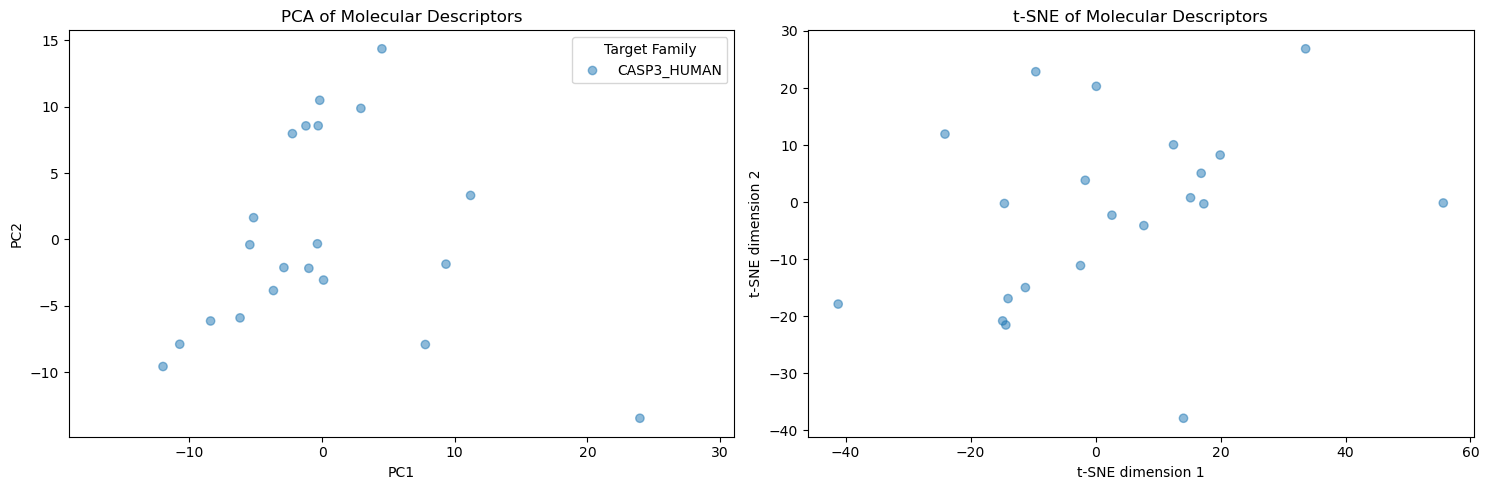

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

print(f'PCA explained variance ratio: {pca.explained_variance_ratio_}')
# Plot PCA results, color by target name
# Assign each target name a colour (integer)
colour_dict = {name: i for i, name in enumerate(df_subset['Target Name'].unique())}
scatter1 = ax1.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5, c=df_subset['Target Name'].map(colour_dict), cmap='tab20')
ax1.set_title('PCA of Molecular Descriptors')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.legend(handles=scatter1.legend_elements()[0], labels=family_dict.keys(), title='Target Family')
ax1.grid()
ax1.axis('equal')

# Plot t-SNE results
scatter2 = ax2.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5, c=df_subset['Target Name'].map(colour_dict), cmap='tab20')
ax2.set_title('t-SNE of Molecular Descriptors')
ax2.set_xlabel('t-SNE dimension 1')
ax2.set_ylabel('t-SNE dimension 2')
ax1.grid()
plt.tight_layout()
plt.show()

# Additional analysis: Feature importance in PCA
feature_importance = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=mol2vec_descriptors_df.columns
)
